In [30]:
!pip install numpy

In [31]:
!pip install pandas

In [32]:
!pip install seaborn

In [33]:
!pip install matplotlib

In [34]:
import seaborn as sns


In [35]:
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd

In [37]:
movies = pd.read_csv('ratings_small.csv')

# New Section

In [38]:
movies.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [39]:
movies = movies.drop(['timestamp'],axis = 1)

In [40]:
movies

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [41]:
movies.shape

(100004, 3)

In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [43]:
movies['userId'].nunique()

671

In [44]:
movies['movieId'].nunique()

9066

In [45]:
# gives the number of user interactions with each of the movie ids
movies['userId'].value_counts()

userId
547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: count, Length: 671, dtype: int64

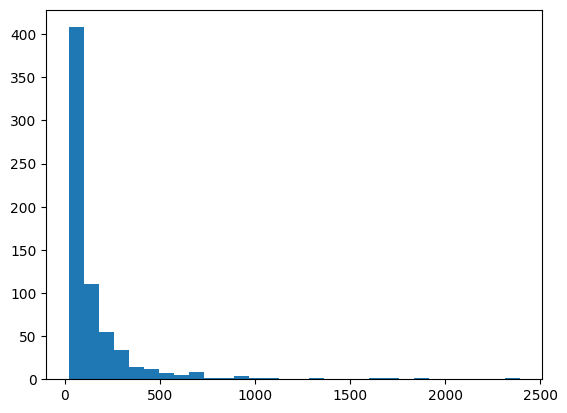

In [46]:
# this shows that there are less number of people having interactions with more movies
interactions = movies.groupby('userId').count()['movieId']
plt.hist(interactions,bins = 30)
plt.show()

In [47]:
interactions_matrix = movies.pivot(index = 'userId', columns = 'movieId',values = 'rating')

In [48]:
interactions_matrix.shape

(671, 9066)

In [49]:
interactions_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
interactions_matrix = interactions_matrix.fillna(0)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

def similar_users(user_id, interactions_matrix):

    similarity = []
    #calcuating the similarity of each user and the specified user id and storing that userid and similarity score in a array
    for user in range(1,interactions_matrix.shape[0]+1):
        sim = cosine_similarity([interactions_matrix.loc[user_id]],[interactions_matrix.loc[user]])
        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse=True)

    #list of just user id
    most_similar_users = [tup[0] for tup in similarity]

    #list of just similarity score
    similarity_score = [tup[1] for tup in similarity]

    #removing the user's id from most similar users as it's similarity with itself will be the greatest
    most_similar_users.remove(user_id)

    #also removing the similarity score of the user with itself from the similarity score array
    similarity_score.remove(similarity_score[0])

    return most_similar_users,similarity_score

In [52]:
similar_users(564, interactions_matrix)[0][:5]

[306, 102, 518, 232, 119]

In [53]:
similar_users(564, interactions_matrix)[1][:5]

[array([[0.4752071]]),
 array([[0.45945837]]),
 array([[0.45806577]]),
 array([[0.42648819]]),
 array([[0.42188474]])]

In [54]:
def recommendations(user_id, num_of_movies, user_item_interactions):

    #finding the most similar users using above function
    most_similar_users = similar_users(user_id, user_item_interactions)[0]

    #find out the movies with this user has already interacted with
    movie_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_id]>0)]))


    recommendations = []

    already_interacted = movie_ids.copy()


    for similar_user in most_similar_users:

        if len(recommendations) < num_of_movies:

            #finding out the movie ids of the similar users
            similar_user_movie_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))

            #adding those movies to recommendations which are not present in the already interacted array
            recommendations.extend(list(similar_user_movie_ids.difference(already_interacted)))

            #now adding those movies that were not present in the already interacted arrays to it as they have been added to recommendations array
            already_interacted = already_interacted.union(similar_user_movie_ids)

        else:
            # break when the number of the movies we need = the length of recommendations
            break
    return recommendations[:num_of_movies]

In [55]:
iD = int(input('Enter the user ID for which you want to find recommendations '))
num = int(input('Enter the number of movies that you want to be recommended '))
#564 5
recommendations(iD, num, interactions_matrix)

Enter the user ID for which you want to find recommendations 44
Enter the number of movies that you want to be recommended 3


[708, 7, 1356]

In [56]:
movies['movieId'].value_counts()[:3]

movieId
356    341
296    324
318    311
Name: count, dtype: int64